# 专业术语
- Indenter = 压头探针
- asperity junctions = 微凸起接触
- abrasive = 粗糙的

# 基本单位

In [6]:
import dataclasses
from DATATYPE import UNIT

# Chapter 2

## Ball-Plane Contact **(Midterm 考到了)**

$$
\frac{1}{E'}=\frac{1}{2}\left[\frac{1-\nu_1^2}{E_1}+\frac{1-\nu_2^2}{E_2}\right]
$$

$$
r_a=\left(\frac{1.5\,F_n\,R}{E'}\right)^{\frac{1}{3}}
$$

### Question 2

A steel ball ($E = 210 \text{ GPa}$, Poisson ratio $0.3$) of **12.7 mm** diameter is  
loaded against a ceramic (silicon carbide, $E = 410 \text{ GPa}$, Poisson ratio $0.14$) flat  
with a force of **10 N**. The contact is supposed to be elastic.  

Calculate the **area of contact** and the **maximum contact pressure**.

Area of contact: $1.47 \times 10^{-2}\ \text{mm}^2$, Contact pressure: $1020.53\ \text{MPa}$


In [ ]:
import dataclasses
from DATATYPE import UNIT
from sympy import symbols, Eq, solve, pretty_print
from IPython.display import display

@dataclasses.dataclass
class BALL:
    E: float = 210 * UNIT.GPa
    Pr: float = 0.3
    d: float = 12.7 * UNIT.mm
    r: float = d / 2

@dataclasses.dataclass
class PLANE:
    E = 410 * UNIT.GPa
    Pr = 0.14


@dataclasses.dataclass
class EQUATION:

    @staticmethod
    def compute_E_P(ball: BALL, plane: PLANE):

        E_P, Pr_Ball, E_Ball, Pr_Plane, E_Plane = symbols('E_P Pr_Ball E_Ball Pr_Plane E_Plane')
        eq = Eq(1 / E_P,   0.5 * ((1 - Pr_Ball**2) / E_Ball + (1 - Pr_Plane**2) / E_Plane))
        display(eq)

        values = {
            Pr_Ball:  ball.Pr,
            E_Ball:   ball.E,
            Pr_Plane: plane.Pr,
            E_Plane:  plane.E
        }

        E_P_solution = solve(eq.subs(values), E_P)[0]

        return E_P_solution

    @staticmethod
    def ball_plane_contact_area(F, ball: BALL, plane: PLANE):
        E_P = EQUATION.compute_E_P(ball, plane)

        r_a, F_n, R, E_P = symbols('r_a F_n R E_P')
        eq = Eq(r_a, (1.5 * F_n * R / E_P) ** (1/3))
        display(eq)

        values = {
            F_n: F,
            R:   ball.r,
            E_P: E_P
        }

        contact_r = solve(eq.subs(values), r_a)[0]
        contact_area = UNIT.pi * contact_r **2

        return contact_area

In [8]:
# 参数
ball  = BALL()
plane = PLANE()
F = 10 * UNIT.N

In [9]:
E_P = EQUATION.compute_E_P(ball, plane)
print(f"E_P          = {E_P / UNIT.GPa} GPa")

a_r = (1.5 * F * ball.r / E_P)**(1/3)
print(f"a_r          = {a_r / UNIT.m} m")

area = UNIT.pi * a_r**2
print(f"area         = {area / (UNIT.mm**2)} mm^2")

pressure_max = (3*F) / (2*area)
print(f"pressure_max = {pressure_max / UNIT.MPa} MPa")

Eq(1/E_P, 0.5*(1 - Pr_Plane**2)/E_Plane + 0.5*(1 - Pr_Ball**2)/E_Ball)

E_P          = 297.417545217139 GPa
a_r          = 0.0000684173318017212 m
area         = 0.0147055791044956 mm^2
pressure_max = 1020.02103374592 MPa


# Chapter 3

### Question 3

Calculate the area of contact in the case of a hard indenter loaded with **9 N** against a soft metal  
(hardness **0.9 GPa**, Young’s modulus **115 GPa**). A perfectly plastic contact is assumed.

**Answer:**  **0.01 mm²**


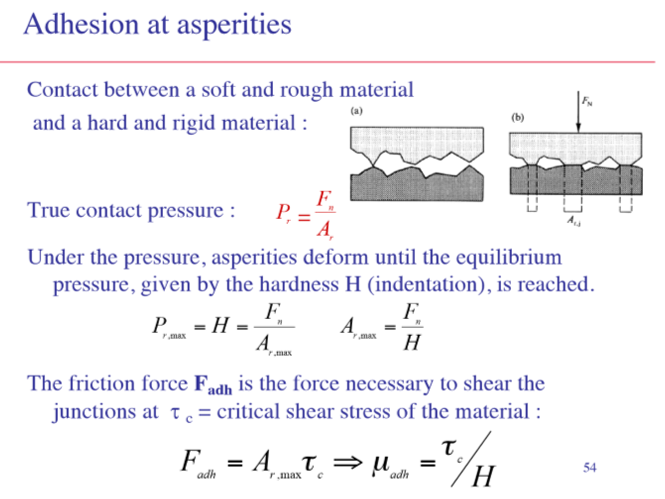

In [10]:
F = 9 * UNIT.N
H = 0.9 * UNIT.GPa
E = 115 * UNIT.GPa

A = F / H

print("Area = ", A / (UNIT.mm**2), "(mm^2)")

Area =  0.01 (mm^2)


# Chapter 4 Lubrication 润滑 **(Midterm考到了)**

### Question 5

The hydrodynamic fluid film thickness established between a perfectly smooth plane  
and a cylinder in an oil-lubricated contact is **107 nm**.  

What is the maximum admissible roughness of the cylinder in order to have **full**  
**contact separation** by the fluid film?

Choose (fill in the circle) the appropriate response from the following values:

- [ ] $ R_q = 0 \,\mu m $
- [ ] $ R_q = 0.025 \,\mu m $
- [x] $ R_q = 0.030 \,\mu m $
- [ ] $ R_q = 0.310 \,\mu m $

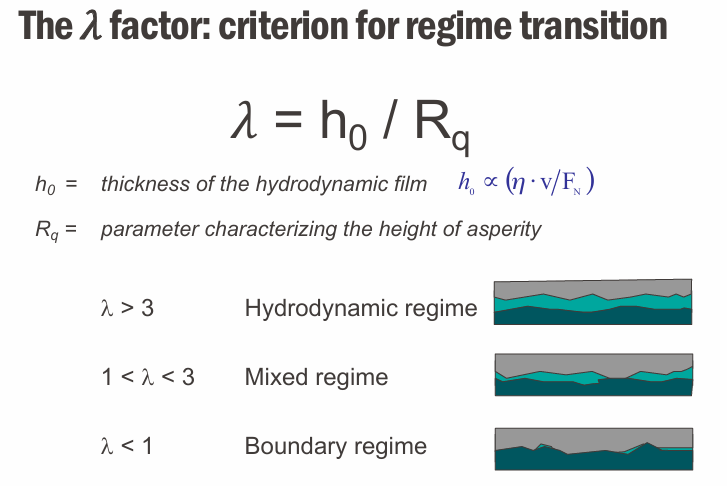

### Question 6

Which of the following correctly describe lubricants?  
Choose (fill in the circle) the most appropriate response from the following statements.
- [ ] Decrease friction  
- [ ] Decrease the extent of wear  
- [ ] Are always liquids  
- [x] Separate the contact surfaces and prevent formation of asperity junctions


In [11]:
_lambda = 3
thickness = 107 * UNIT.nm

R_q = thickness / _lambda

print("max height R_q = ", R_q / UNIT.um, "(um)")

max height R_q =  0.03566666666666667 (um)


# Chapter 5 Wear 磨损 **(Midterm 考到了)**

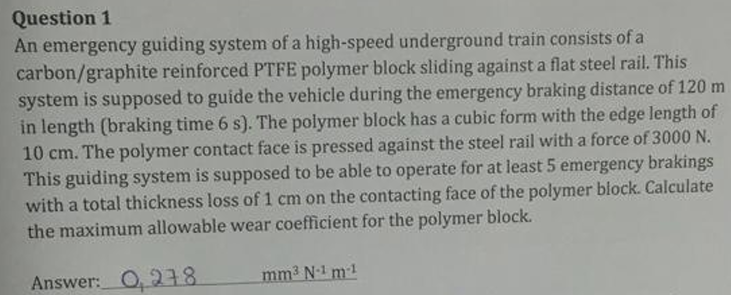

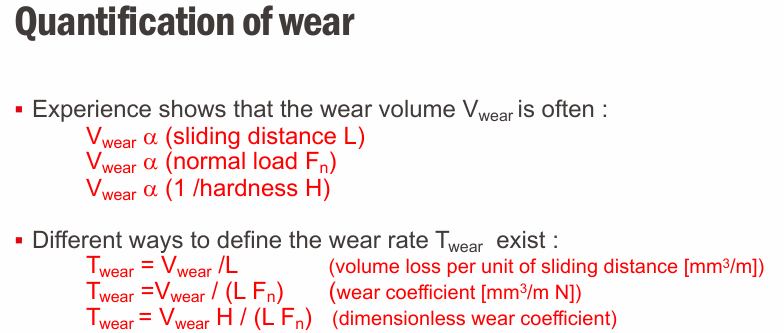

In [ ]:
# breaking distance = 120 m
# breaking time     = 6 s
# Cube edge length  = 10 cm
# max loss          = 1 cm

# wear coefficient = volume / (force * distance)

F = 3000 * UNIT.N
L = 120 * UNIT.m
times = 5

L_total = 

cube_length      = 10 * UNIT.cm
cube_area        = cube_length**2
cube_loss_height = 1 * UNIT.cm

teared_volume = cube_area * cube_loss_height

wear_coefficient = teared_volume / (F * L)
wear_coefficient / (UNIT.mm**3 / (UNIT.N * UNIT.m))

0.2777777777777778